## Objetivo especifico #4
#### Para cumplir nuestro objetivo especifico numer 4 elaboraremos un modelo de kmenas para identificar los perfiles de los compradores e inferir si el numero de jovenes en el hogar influye en el dinero gastado por un cliente del comercio.

## Regresion Lineal 

## 0. Importar librerías.

In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np            

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler       

from copy import deepcopy

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import confusion_matrix

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer  

## 1. Datos

In [3]:
df = pd.read_csv('../../datos/clean_marketing_campaing.csv')

### 1.1 Descripción

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.903125,51629.990625,0.444196,0.506250,49.109375,285.683259,14.281250,112.670089,21.314286,...,5.274107,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.694144,20564.847403,0.538398,0.544538,28.962453,310.279574,18.719299,135.044047,27.831455,...,2.303046,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51377.250000,0.000000,0.000000,49.000000,173.250000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,479.000000,19.000000,153.000000,28.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1224.000000,81.000000,555.000000,120.000000,...,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Para la creacion del modelo generaremos una nueva columna con la cantidad de jovenes y la cantidad de niños por hogar, consolidandola en una nueva variable "YoungHome" 

In [7]:
df['YoungHome'] = df['Kidhome'] + df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,YoungHome
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,...,0,0,0,0,0,0,3,11,0,1


Del mismo modo, como deseamos saber si la cantidad de jovenes y niños en el tiene una relacion con la cantidad de dinero gastado, consolidamos las cantidades de dinero gastado en cada categoria y se plazman en una nueva columna llamada "MntTotal"

In [8]:
df['MntTotal'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines']
+ df['MntGoldProds']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,YoungHome,MntTotal
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,...,0,0,0,0,0,3,11,1,0,1209.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,...,0,0,0,0,0,3,11,0,2,21.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,...,0,0,0,0,0,3,11,0,0,734.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,...,0,0,0,0,0,3,11,0,1,48.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,...,0,0,0,0,0,3,11,0,1,407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,...,0,0,0,0,0,3,11,0,1,984.0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,...,0,0,1,0,0,3,11,0,3,436.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,...,1,0,0,0,0,3,11,0,0,1217.0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,...,0,0,0,0,0,3,11,0,1,782.0


In [9]:
df_kmeans = deepcopy(df)
df_kmeans.drop(['Year_Birth','Education','Marital_Status','ID','Kidhome','Teenhome','Dt_Customer',
                       'Recency','Recency','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2'
                       ,'Complain','Z_CostContact','Z_Revenue','Response','MntWines','MntFruits','MntMeatProducts',
               'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',
                'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3'],inplace=True, axis=1)
df_kmeans

,Income,YoungHome,MntTotal
0,58138.0,0,1209.0
1,46344.0,2,21.0
2,71613.0,0,734.0
3,26646.0,1,48.0
4,58293.0,1,407.0
...,...,...,...
2235,61223.0,1,984.0
2236,64014.0,3,436.0
2237,56981.0,0,1217.0
2238,69245.0,1,782.0


Dejaremos en nuestro dataset unicamente las columnas "income" , "YoungHome" y "MntTotal"

## 2. Creación de un modelo

En vista de que buscaremos generar el modelo que mejor se adapte a nuestros datos, vamos a definir una función que genere construya un modelo K-Means a corde a un grupo de parámetros definidos.

In [10]:
def create_KMeans(k, kmin, kmax, init, n_init, max_iter, random_seed):
    kmeans = KMeans(n_clusters   = k,
                  init         = init,
                  n_init       = n_init,
                  max_iter     = max_iter,
                  random_state = random_seed)
    
    return kmeans

### Entrenamiento de modelos

Con nuestra función definida nos restaría entrenar diferentes modelos para diferentes valores de K. Para este caso vamos a entrenar para valores de $K = 1$ hasta $K = 15$.

Empezamos definiendo algunas constantes para cada modelo y el valor mínimo y máximo de $K$.

In [11]:
kmin = 1
kmax = 15          
init ='k-means++'
n_init = 10
max_iter = 400
random_seed = 42

### Evaluación de diferentes modelos

Ahora usaremos la silueta, el método del codo y el índice de Calinski-Harabasz para determinar el mejor $K$ para la creación de un modelo

In [12]:
def evaluate_models(data, kmin, kmax, init, n_init, max_iter, random_seed):
    
    model = KMeans(init=init, 
                    n_init=n_init, 
                    max_iter=max_iter, 
                    random_state=random_seed)

    for metric in ["distortion", "silhouette", "calinski_harabasz"]:

        if metric=="silhouette" or metric=="calinski_harabasz":  
            kmin_ = max(2,kmin)
        else:
            kmin_ = kmin

        plt.figure(figsize=(10,5))
        visualizer = KElbowVisualizer(estimator=model, 
                                      k=(kmin_,kmax+1),
                                      metric=metric,
                                      timings=False,          
                                      locate_elbow=True)
        visualizer.fit(data)
        visualizer.show()

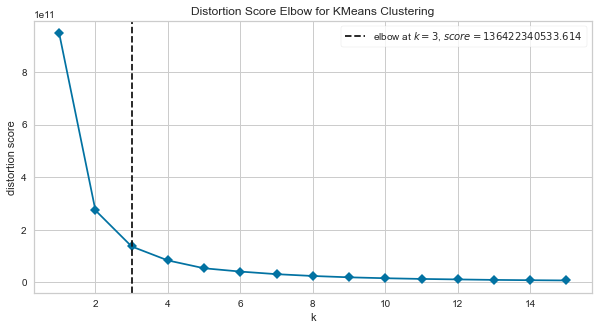

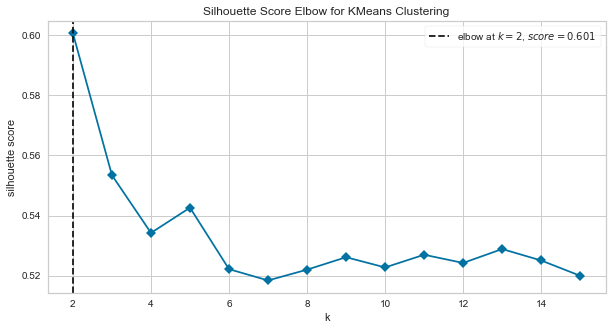

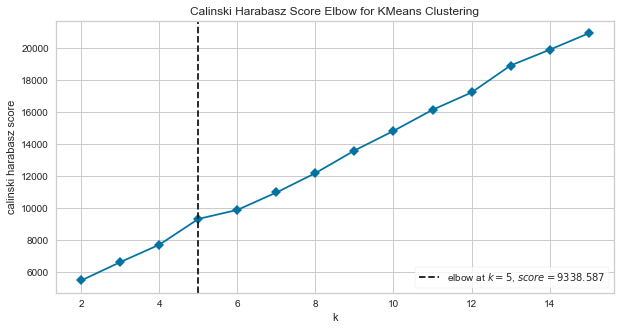

In [13]:
evaluate_models(df_kmeans, kmin, kmax, init, n_init, max_iter, random_seed)

En vista de que nuestros estimados no arrojan ningún K en común, vamos a evaluar los tres valores de $K$ propuestos: $K = 2$, $K = 3$ Y $K = 5$ por medio de las gráficasd e la silueta.

In [14]:
possible_k = [2, 3, 5]

For k clusters = 2 The average silhouette_score is : 0.6005859461644852


C:\Users\Giova\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


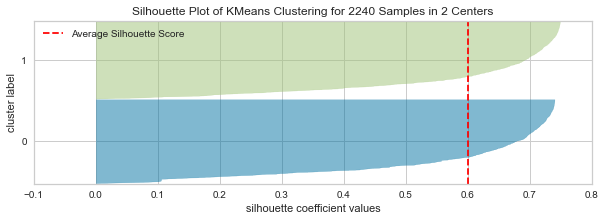

For k clusters = 3 The average silhouette_score is : 0.5534118098177195


C:\Users\Giova\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


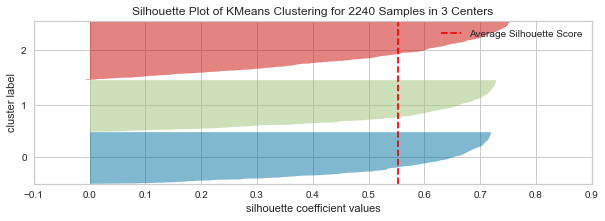

For k clusters = 5 The average silhouette_score is : 0.5426249851279743


C:\Users\Giova\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


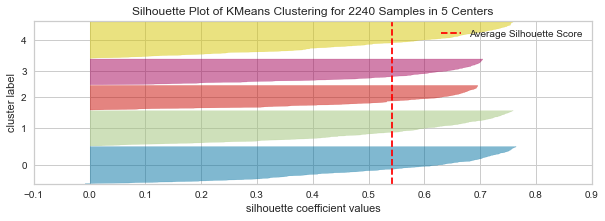

In [15]:
silhouette_score_list = []

for k in possible_k:
    model_K = create_KMeans(k, kmin, kmax, init, n_init, max_iter, random_seed)
    model_K.fit(df_kmeans)
    
    sc = silhouette_score(df_kmeans.values, model_K.labels_)
    silhouette_score_list.append(sc)
    
    print(
        "For k clusters =",
        k,
        "The average silhouette_score is :",
        sc,
    )
    plt.figure(figsize=(10,3))  #Tamaño de la figura (ancho, alto).
    visualizer2 = SilhouetteVisualizer(estimator=model_K, colors='yellowbrick')
    visualizer2.fit(df_kmeans)
    visualizer2.show() 

En este caso escogemos el k=3 para contruir nuestro modelo

### Modelo Seleccionado

In [16]:
k = 3

#Entrenamiento del modelo
kmeans_model = create_KMeans(k, kmin, kmax, init, n_init, max_iter, random_seed)
kmeans_model.fit(df_kmeans)

KMeans(max_iter=400, n_clusters=3, random_state=42)

In [17]:
#Centroides
kmeans_model.cluster_centers_

array([[2.79432891e+04, 1.12290503e+00, 6.99301676e+01],
       [7.54601500e+04, 4.75000000e-01, 8.87712500e+02],
       [5.13836766e+04, 1.22263682e+00, 3.90372512e+02]])

Como se puede ver, no resulta posible graficar los clusters realizados para los perfiles de comprador, porque nuestras categorías se encuentran en $R^{9}$

## 3. Evaluación

In [18]:
print('Inercia: ', kmeans_model.inertia_, '\n',
     '# clusters: ', kmeans_model.n_clusters, '\n')

Inercia:  136427191625.81036 
 # clusters:  3 



El modelo que hemos escodigo presenta una inercia de $136427191625.81012$ y un conjunto de $3$ clusters que son nuetros $3$ perfiles de compradores.

## 4. Resultados

Con los clusters obtenidos solo nos resta caracterizarlos para poder darles una mejor interpretación. Para ello añadimos a los datos la columna de Profile, en donde se va a encontrar el perfil de comprador de un cliente.

In [19]:
df_kmeans['Profile'] = kmeans_model.predict(df_kmeans)
df_kmeans['Profile']

0       2
1       2
2       1
3       0
4       2
       ..
2235    2
2236    1
2237    2
2238    1
2239    2
Name: Profile, Length: 2240, dtype: int32

In [20]:
df_kmeans['Profile'].describe()

count    2240.000000
mean        1.039732
std         0.823793
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Profile, dtype: float64

### Características de cada perfil

Ahora podemos verificar si existe alguna relación entre el perfil de comprador y los ingresos del mismo

#### Ingresos 

<AxesSubplot:xlabel='Income', ylabel='Count'>

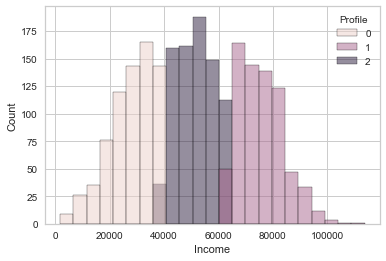

In [21]:
sns.histplot(data=df_kmeans, x='Income', hue='Profile')

Como nos muestra la gráfica, encontramos que los ingresos de nuestros perfiles comprador se encuentran destribuidos de la siguiente manera:

- 0: Ingresos entre 0 y 40.000 dólares
- 1: Ingresos entre 40.000 y 60.000 dólares
- 2: Ingresos entre 60.000 y un millón de dólares

<AxesSubplot:xlabel='YoungHome', ylabel='Count'>

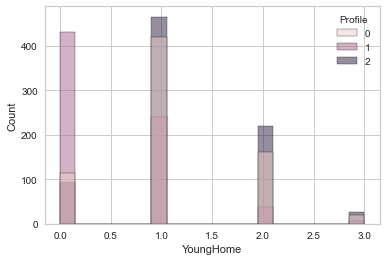

In [22]:
sns.histplot(data=df_kmeans, x='YoungHome', hue='Profile')

Con respecto a el numero de jovenes por hogar tenemos que predomina nuestro perfil 1 con ningun joven en el hogar mientras que los perfiles 2 y 0 predominan en uno y dos jovenes en el hogar.

<AxesSubplot:xlabel='MntTotal', ylabel='Count'>

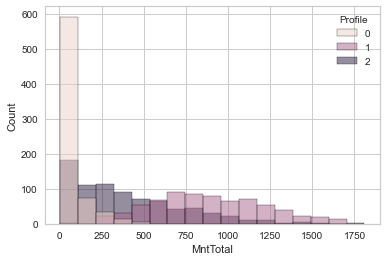

In [23]:
sns.histplot(data=df_kmeans, x='MntTotal', hue='Profile')

Con respecto a la cantidad total de dinero gastada por los perfiles en las distintas categorias, tenemos que el perfil 0 el cual es que tiene ingresos medios y predomina en un joven por hogar, son tambien los que tienen generalmente un gasto menor. mientras nuestro perfil 2 y 1 tienen un consumo medio.

### Especificación final de cada perfil

+ Perfil 0: El pefil 0 es un cliente promedio, sus ingresos están entre 40.000 y 60.000 dólares. Predomina con 1 o 2 jovenes en su hogar y la cantidad de gastos que realiza en las distintas categorias se encuentra predominantemente en los montos bajos entre cero y 250.

+ Perfil 1:Este comprador presenta ingresos bajos, entre 0 y 40.000 dólares. Predomina en que no hay ningun joven en el hogar, sin embargo, sus gastos se encuentran entre los mayores predominando este perfil entre los 700 y los 1500.

+ Perfil 2: Podemos identificar a estos compradores como una persona que cuenta con altos ingresos, comparten la cantidad de jovenes en el hogar de entre 1 y 2, del mismo modo se encuentran en un rango medio de gastos.

In [ ]:
from joblib import dump

dump(clf, '.joblib') 